# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1304 Макки Карим. Вариант №39.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Рассмотрим методы вычисления одночленов за минимальное число операций, а также приведём некоторые оценки количества операций для вычисления одночленов.

Введём понятия для оценки числа операций:


$\lambda(n)=\lceil log_2(n) \rceil$ - уменьшенная на 1 длина бинарной записи $n$

$\nu(n)$ - количество единиц в двоичной записи числа $n$ (вес Хемминга)

### Бинарный метод $SX$
Ниже представлен алгоритм бинарного возведения в степень $n$ с использованием методов $S$ и $X$, обозначаемый как метод $SX$:
<ol>
<li>Запишем число $n$ в двоичной системе счисления, представив его в виде $n = (a_{m}, a_{m-1}, ..., a_{1})_{2}$, где $a_{m} = 1$</li>
<li>Удалим старший бит из записи числа $n$</li>
<li>Преобразуем полученную запись числа $n$: если $a_{i} = 1$, то заменим $a_{i}$ на $X$, а если $a_{i} = 0$, то заменим $a_{i}$ на $S$</li>
<li>Вычислим значение $x^{n}$, начиная с $x$. Для этого пройдем по преобразованной записи числа $n$ и выполним следующие действия: если $a_{i} = S$, то возведем $x$ в квадрат, а если $a_{i} = X$, то умножим $x$ на себя</li>
</ol>
Количество операций, требуемых для выполнения бинарного возведения в степень методом $SX$, может быть выражено как $\lambda(n) + \nu(n) - 1$, где $\lambda(n)$ и $\nu(n)$ обозначают количество ненулевых битов и количество единичных битов в двоичной записи числа $n$, соответственно.


### Бинарный метод возведения в степень справа налево
Ниже приведен метод возведения числа $x$ в степень $n$, который осуществляется справа налево. Другими словами, данный алгоритм позволяет вычислить значение $x^n$.
<ol>
    <li>Инициализируем $N = n; Y = 1; Z = x$</li>
    <li>Если $N$ чётно, то переходим к пункту 3, иначе к пункту 4</li>
    <li>Сначала $N = \lfloor N/2 \rfloor, далее   Z = Z * Z$, затем переходим к пункту 2</li>
    <li>Сначала $N = \lfloor N/2 \rfloor, далее   Y = Z * Y$</li>
    <li>Если $N = 0$, то $Y$ - результат работы алгоритма. Иначе снова $Z = Z * Z$ и переходим к пункту 2</li>
</ol>
Количество операций для данного метода равно $\lambda(n) + \nu(n)$

### Метод множителей
Данный метод алгоритма можно использовать для вычисления $x^n$ при любых натуральных $n$, следуя нескольким шагам:
<ol>
    <li>Разложить $n$ на простые множители: $n = p * q$, где $p$ - наименьший простой множитель $n$, а $q > 1$.</li>
    <li>Вычислить $x^p$ и возвести его в степень $q$, чтобы получить $x^n$.</li>
    <li>Если $n$ является простым числом, то вычислить $x^{n-1}$ и умножить его на $x$.</li>
<li>Если $n = 1$, то результатом будет $x^n$.</li>
    
Примечание: Чтобы вычислить $p$, можно использовать данный алгоритм для любого натурального числа, начиная с $2$, пока не будет найден наименьший простой множитель $n$.
</ol>

### Дерево степеней
Рассмотрим алгоритм построение дерева степеней до $k$-го уровня:
<ol>
    <li>На нулевом уровне в дереве только один узел - $1$ - корень дерева</li>
    <li>Далее строим $k+1$-й уровень: берём каждый узел $i$ на $k$-м уровне слева направо и присоединяем узлы $i+a_{0}, i+a_{1}, ..., i+a_{k-1}$</li>
    <li>Если какой-то узел уде появлался раньше в дереве, то он устраняется, т.е. новый повторный узел не добавляется</li>
</ol>

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1. Бинарный метод "SX"
функцию $sx\_method$, принимающую на вход целочисленное значение $n$, являющееся степенью, в которую нужно возвести переменную. Это функция которая реализует бинарный метод $SX$ для вычисления $x^n$, где $x$ является входной переменной, а $n$ - неотрицательным целым числом. Функция сначала проверяет, является ли $n$ меньшим, чем 1, и если да, возвращает 1. Затем она создает строку $seq\_SX$, представляющую последовательность $S$ и $X$ в двоичном представлении $n$, где каждая $"S"$ соответствует операции возведения в квадрат, а каждая $"X"$ соответствует умножению на $x$. Далее функция применяет бинарный метод $SX$, перебирая последовательность $seq\_SX$. На каждой итерации она обновляет степень $x$ в зависимости от текущего символа в $seq\_SX$ и добавляет новую степень в список $degrees$. Также она выводит значение $x^degree$ после каждой итерации. Наконец, функция выводит количество выполненных операций (т.е. длину списка degrees) с помощью функции $len()$.

In [23]:
def sx_method(n):
    if n < 1: # Модификация
       return 1
    # Store the sequence of S's and X's in a string
    seq_SX = ""
    bin_n = bin(n)[3:]
    for i in bin_n:
        if i == '1':
            seq_SX += "SX"
        else:
            seq_SX += "S"
    print(seq_SX)
    # Apply the binary SX method and print the values of x^i after each iteration
    degrees = []
    degree = 1
    for elem in seq_SX:
        if elem == "S":
            degree *= 2
        elif elem == "X":
            degree += 1
        degrees.append(degree)
        print(x^degree, end=' ')
    
    print("\nNumber of operations: ", len(degrees))

Приведем примеры работы при некоторых n

In [24]:
sx_method(0)

1

In [18]:
sx_method(9)

SSSX
x^2 x^4 x^8 x^9 
Number of operations:  4


In [25]:
sx_method(13)

SXSSX
x^2 x^3 x^6 x^12 x^13 
Number of operations:  5


In [26]:
sx_method(57)

SXSXSSSX
x^2 x^3 x^6 x^7 x^14 x^28 x^56 x^57 
Number of operations:  8


Проверим оценку числа операций:  
$n = 9 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 3; \nu(n) = 2; \lambda(n) + \nu(n) - 1 = 4 \Rightarrow$ Верно<br>
$n = 13 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 3; \nu(n) = 3; \lambda(n) + \nu(n) - 1 = 5 \Rightarrow$ Верно<br>
$n = 57 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 4; \lambda(n) + \nu(n) - 1 = 8 \Rightarrow$ Верно<br>
Таким образом, формула для вычисления количества операций для представленных $n$ корректна.

<b>Выводы:</b>  
Был применен бинарный метод $SX$, который был проверен на правильность работы и имеет оценку количества операций подтверждающую его эффективность. Этот метод является простым в реализации и понимании, но в то же время позволяет быстро вычислять мономы. Оценка количества операций позволяет легко определить, сколько операций потребуется для выполнения вычислений при использовании данного метода.

### 2. Бинарный метод возведения в степень справа налево
функции $right\_to\_left\_method(n)$ реализует алгоритм быстрого возведения в степень из теории чисел. Принимает параметр $n$ - это значение, которое нужно возвести в степень. В цикле $while$ производится вычисление степени с помощью следующих формул:
1. Если степень четная, то значение степени делится на 2 и основание умножается само на себя.
2. Если степень нечетная, то значение степени также делится на 2, а в ответ умножается основание. Если значение степени после этого становится равным 0, то цикл завершается.

В процессе выполнения цикла выводятся промежуточные результаты в виде значения счетчика и текущих значений переменных $N$, $Y$ и $Z$.
По завершении цикла выводится окончательный результат в виде значений счетчика и переменных $N$, $Y$ и $Z$, а также возвращается ответ - значение $Y$, которое содержит результат возведения основания в заданную степень.

In [29]:
def right_to_left_method(n):
    count = 0
    N = n
    Y = 1
    Z = var('x')
    while True:
        if N % 2 == 0: # Если степень четная
            N = floor(N/2)
            Z *= Z
        else: # Если степень нечетная
            N = floor(N/2)
            Y *= Z
            if N == 0: 
                count += 1
                break
            else:
                Z = Z * Z
        count += 1
        print(f"i: {count} N: {N} Y: {Y} Z: {Z}\n") # Вывод промежуточного результата
    print(f"i: {count} N: {N} Y: {Y} Z: {Z}\n") # Вывод окончательного результата
    return Y # Возвращаем ответ

Приведем примеры работы при некоторых n. Для каждого из них представим результат в виде таблицы.

In [30]:
right_to_left_method(9)

i: 1 N: 4 Y: x Z: x^2

i: 2 N: 2 Y: x Z: x^4

i: 3 N: 1 Y: x Z: x^8

i: 4 N: 0 Y: x^9 Z: x^8



x^9

Таблица для $n$=9


| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     9      |      1     |      $x$   |
|      1     |     4      |      $x$   |    $x^2$   |
|      2     |     2      |      $x$   |     $x^4$  |
|      3     |     1      |      $x$   |     $x^8$  |
|      4     |     0      |      $x^9$ |    $x^{8}$|

In [31]:
right_to_left_method(13)

i: 1 N: 6 Y: x Z: x^2

i: 2 N: 3 Y: x Z: x^4

i: 3 N: 1 Y: x^5 Z: x^8

i: 4 N: 0 Y: x^13 Z: x^8



x^13

Таблица для $n$=13

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     13     |      1     |     $x$    |
|      1     |      6     |     $x$    |    $x^2$    |
|      2     |      3     |     $x$    |    $x^4$   |
|      3     |      1     |    $x^5$   |    $x^8$   |
|      4     |      0     |  $x^{13}$  |   $x^{8}$  |

In [32]:
right_to_left_method(57)

i: 1 N: 28 Y: x Z: x^2

i: 2 N: 14 Y: x Z: x^4

i: 3 N: 7 Y: x Z: x^8

i: 4 N: 3 Y: x^9 Z: x^16

i: 5 N: 1 Y: x^25 Z: x^32

i: 6 N: 0 Y: x^57 Z: x^32



x^57

Таблица для $n$=57

| № итерации | Значение N | Значение Y | Значение Z |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     57     |      1     |     $x$    |
|      1     |     28     |     $x$    |    $x^2$    |
|      2     |     14     |     $x$    |    $x^4$   |
|      3     |      7     |     $x$    |    $x^8$   |
|      4     |      3     |    $x^9$   |  $x^{16}$  |
|      5     |      1     |  $x^{25}$  |  $x^{32}$  |
|      6     |      0     |  $x^{57}$  |  $ x^{32}$ |

Проверим оценку числа операций:  
$n = 9 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 3; \nu(n) = 2; \lambda(n) + \nu(n) = 5 \Rightarrow$ Верно<br>
$n = 13 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 3; \nu(n) = 3; \lambda(n) + \nu(n)  = 6 \Rightarrow$ Верно<br>
$n = 57 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 4; \lambda(n) + \nu(n)  = 9 \Rightarrow$ Верно<br>
Таким образом, формула для вычисления количества операций для представленных $n$ корректна.

<b>Выводы:</b>  
Был реализован бинарный метод возведения справа налево. Его работа была проверена и правильность была подтверждена с помощью оценки числа операций. Этот метод более сложен в реализации и понимании, чем бинарный метод $SX$, и для вычисления мономов требуется на одну операцию больше. Однако, благодаря оценке операций, можно легко узнать количество операций, необходимых для использования данного метода. В общем случае, после завершения алгоритма, значение $Z$ равно $x^{2^{k-2}}$, где $k$ - количество итераций метода.

### 3. Сравнение бинарного метода $SX$  и метода возведение справа налево

Опираясь на оценку числа операций, можно сказать, что количество операций в методе $SX$ меньше, чем в методе возведения справа налево. В методе $SX$ число операций равно $\lambda(n)+\nu(n)-1$, а в методе возведения справа налево равно $\lambda(n)+\nu(n)$ или же можно оценить как $\lfloor \log_{2}(n) \rfloor + 2$.

<b>Выводы:</b>  
Исходя из вышесказанного можно заключить, что бинарный метод $SX$ выгоднее метода возведения справа налево.

### 4. Метод множителей

Выполним метод множителей вручную для некоторых n по алгоритму из теоретического положения.

При $n$=9

$x^{9} = (x^{3})^{3}$<br>
$(x^{3})^{3} = (x^{3})^{2} * (x^{3})$ - (1 операция)<br>
$(x^{3})^{2} = (x^{3})*(x^{3})$ - (1 операция)<br>
$x^{3} = (x^{2})*x$ - (1 операция)<br>
$x^{2} = x*x$ - (1 операция)<br>

Итого 4 операций.

При $n$=13

$x^{13} = x * x^{12}$<br>
$x^{12} = (x^2)^6$<br>
$(x^2)^6 = ((x^2)^2)^3$<br>
$x^2 \rightarrow x, x^2$ (1 операция)<br>
$(x^2)^2 \rightarrow x^2, (x^2)^2$ (+1 операция)<br>
$x^{12} = ((x^2)^2)^3 = (x^2)^2, ((x^2)^2)^2, ((x^2)^2)^3$ (+2 операция)<br>
$x^{13} = x^{12} * x$ (+1 операция)<br>
Итого 5 операций.

При $n$=57

$x^{57} = (x^{3})^{19}$<br>
$(x^{3})^{19} = x^{3} * (x^{3})^{18}$<br>
$(x^{3})^{18} = ((x^{3})^{2})^{9}$<br>
$((x^{3})^{2})^{9} = (((x^{3})^{2})^{3})^{3}$<br>
$x^3 \rightarrow x, x^2, x^3$ (2 операции)<br>
$(x^3)^2 \rightarrow x^3, (x^3)^2$ (+1 операция)<br>
$((x^3)^2)^3 \rightarrow (x^3)^2, ((x^3)^2)^2, ((x^3)^2)^3$ (+2 операции)<br>
$(x^3)^{18} = (((x^3)^2)^3)^3 \rightarrow ((x^3)^2)^3, (((x^3)^2)^3)^2, (((x^3)^2)^3)^3$ (+2 операции)<br>
$x^{57}=(x^3)^{19} \rightarrow (x^3)^{18}, (x^3)^{19}$ (+1 операция)<br>
Итого 8 операций.

Также рассмотрим $n=15$, при котором метод множителей быстрее $SX$.

$x^{15} = (x^3)^5$
$x^{5} = x * x^4$
Рассчитаем нужные значения
$x^2 \rightarrow x, x^2, x^3$ (2 операции)<br>
$x^4 \rightarrow x, x^2, x^4$ (+2 операция)<br>
$x^5 \rightarrow x^4, x^5$ (+1 операция)<br>
Итого 5 операций (против 6 у метода $SX$)<br>

<b>Выводы:</b>  
Был рассмотрен метод множителей для нескольких значений n. Его плюсы в простоте идеи , а также возможностью применения вручную. Кроме того, он может работать быстрее, чем другие методы. Однако, его недостатки заключаются в сложности программной реализации и том, что в некоторых случаях он требует большего количества операций, чем другие методы.

### 5. Построение дерева степеней

Представим алгоритм построения "дерева степеней" (<i>create_tree_with_degree</i>) до заданного уровня $max\_degree$. Дерево сохраняется в структуре, которая основана на словаре с ключом в виде узла и списком родителей этого узла. Мы перебираем уровни от 0 до $max_degree$, и если новый элемент еще не существует в дереве, то мы вставляем его на следующий уровень. Функция <i>find_path_to_node</i> используется для построения цепочки от корня до выбранного узла.

In [22]:
def find_path_to_node(tree, node):
    path = [node]
    while node != 1:
        node = tree[node][0]
        path.append(node)
    return list(reversed(path))

def create_tree_with_degree(max_degree):
    tree = {1: []}
    current_nodes = [1]
    for level in range(max_degree):
        next_nodes = []
        for parent in current_nodes:
            for node_in_path in find_path_to_node(tree, parent):
                potential_child = parent + node_in_path
                if potential_child not in tree:
                    tree[potential_child] = [parent]
                    next_nodes.append(potential_child)
        current_nodes = next_nodes
    return tree


Функция <i>edges_to_node</i> создает список кортежей-ребер от вершины до заданного узла

In [23]:
def edges_to_node(tree, node):
    path_to_node = find_path_to_node(tree, node)
    edges = []
    for i in range(len(path_to_node)-1):
        edge = (path_to_node[i], path_to_node[i+1])
        edges.append(edge)
    return edges

Функция <i>print_degrees_tree</i> выводит дерево в виде графа и выделяет на рисунке ребра пути до заданного $n$

In [26]:
def Output_tree(tree, node=None):
    graph = Graph(tree)
    if node not in tree:
        node = 1
    graph_plot = graph.plot(layout = 'tree', tree_root = 1, vertex_color = 'white', by_component = True,
                         edge_colors={(0, 1, 0): edges_to_node(tree, node)})
    graph_plot.show()

Представим работу метода на некоторых $n$

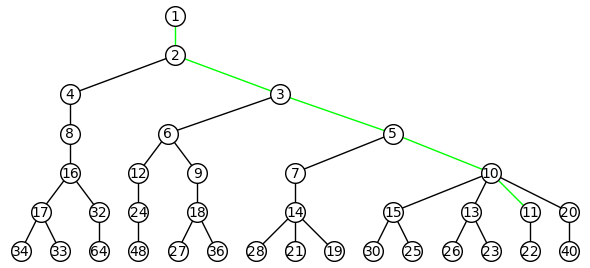

In [27]:
Output_tree(create_tree_with_degree(6), 11)

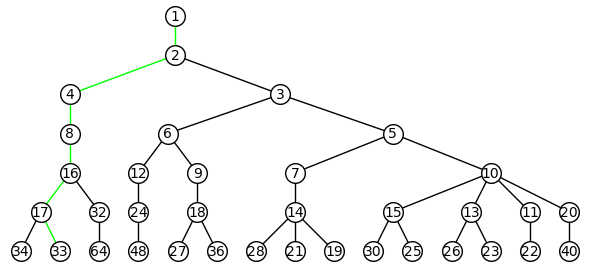

In [19]:
Output_tree(create_tree_with_degree(6), 33)

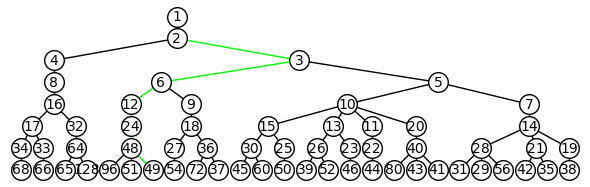

In [20]:
Output_tree(create_tree_with_degree(7), 49)

Таким образом, например для $n$=49

In [21]:
find_path_to_node(create_tree_with_degree(7), 49)

[1, 2, 3, 6, 12, 24, 48, 49]

Получаем цепочку $x$, $x^2$, $x^3$, $x^6$, $x^{12}$, $x^{24}$, $x^{48}$, $x^{49}$

Cравним данный метод с бинарным методом $SX$. Для этого создадим функцию <i>get_amount_of_operations_sx_method</i>, которая возвращает количество операций в бинарном методе $SX$, а также функцию <i>get_operations_in_degrees_tree</i>, которая возвращает количество операций в "дереве степеней"

In [ ]:
def get_operations_in_sx_method(n):
    return floor(log(n, 2)) + bin(n)[2:].count('1') - 1

def get_operations_in_degrees_tree(n):
    ops_counter = 0
    founded = False
    tree = {1:[]}
    current_nodes = [1]
    while not founded:
        ops_counter += 1
        next_nodes = []
        for parent in current_nodes:
            for node_in_path in find_path_to_node(tree, parent):
                probably_child = parent + node_in_path
                if probably_child == n:
                    founded = True
                if probably_child not in tree:
                    tree[probably_child] = [parent]
                    next_nodes.append(probably_child)
        current_nodes = next_nodes
    return ops_counter

Проверим, что дерево степеней не хуже бинарного метода $SX$ в интервале $2 \leq n \leq  1000$

In [39]:
is_better = True

for n in range(2, 1000):
    if get_operations_in_sx_method(n) < get_operations_in_degrees_tree(n):
        is_better = False
        break
        
if is_better:
    print("Верно")
else:
    print("Не Верно")

Верно


<b>Выводы</b>  
Был применен алгоритм "дерева степеней", которое было представлено в виде дерева с помощью SageMath до определенного уровня $k$. Был выделен путь цветом от корня дерева до заданного числа $n$. Сравнив результаты, было определено, что метод "дерева степеней" превосходит бинарный метод $SX$, а следовательно, и метод возведения в степень справа налево. Кроме того, дерево степеней оказалось лучшим методом множителей в отношении количества выполненных умножений.

### 6. Изменённое дерево степеней

Внесём незначительные изменения в определение дерева степеней. Сделаем так, чтобы узлы, расположенные ниже узла $i$ присоединялись в порядке убывания:<br>
$i+a_{k-1}, ..., i+a_{1},i+a_{0}$<br>
Получится дерево убывающих степеней. Модифицируем функцию получения узлов, расположенных ниже $i$, чтобы она отвечала условию выше:

In [35]:
def find_path_to_node(tree, node):
    path = [node]
    while node != 1:
        node = tree[node][0]
        path.append(node)
    return path

Продемонстрируем работу программы. Построим дерево до 6-го уровня и выделим путь до вершины $n=21$:

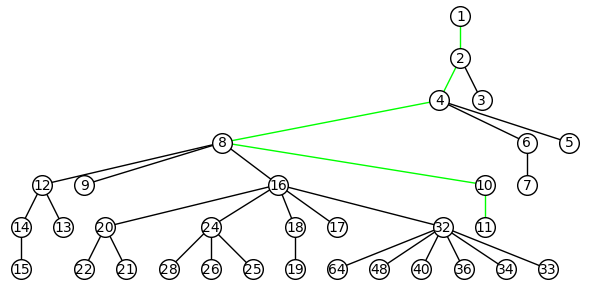

In [48]:
Output_tree(create_tree_with_degree(6), 11)

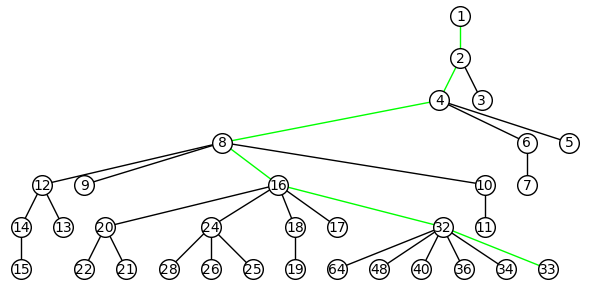

In [49]:
Output_tree(create_tree_with_degree(6), 33)

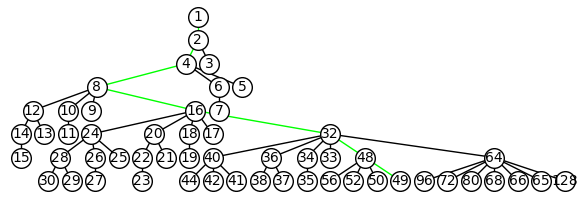

In [50]:
Output_tree(create_tree_with_degree(7), 49)

In [51]:
is_better = True

for n in range(2, 1000):
    if get_operations_in_sx_method(n) < get_operations_in_degrees_tree(n):
        is_better = False
        break
        
if is_better:
    print("Верно")
else:
    print("Не Верно")

Верно


## Выводы



Были усвоены знания о том, как вычислять одночлены при помощи минимального количества операций, приобретены навыки использования систем компьютерной математики для реализации таких алгоритмов. Были созданы алгоритмы вычисления мономов, которые используют минимальное количество операций и реализованы с помощью системы компьютерной алгебры SageMath. Был проведен анализ этих алгоритмов, и полученные результаты были тщательно проанализированы.